# Illegal Fishing Machine Learning Project

### Kelly Kai Tokunaga DTSC 691

### Introduction 

The purpose of this project is to develop a machine learning model that can predict whether an oceanic vessel is in the act of fishing or not, and then to determine if this fishing activity is legal or not. 

Where did this data come from?
This data is came from logs that are supplied by Automatic Identification System or AIS. 
AIS is a system that large vessels use at sea to identify themselves. Every few seconds a signal is sent out by this system that other boats, sattelites, and terrestrail recievers can receive. Initially this system was just meant to help improve saftey for large vessels at sea and reduced collisions but now can be used in other ways. AIS devices broadcast the vessel’s identity, location, speed, course, and other data that is useful for identification. 
I got this data from Global Fishing Watch. They have produced ML algorithms that can identify a boats activity based on this AIS data. 

I will be using the data provided on their website to predict whether a boat is fishing or not, and if so, determine if that activity is suspicious in anyway. 
This is an important issue because illegal fishing is a huge issue that we are facing globally. Stopping this illegal actvity is a necessary step in restoring our natural fisheries to a sustaionable level. 
Obviously, the ocean is a massice and ungovernable place. With a ML model that could identify illegal vessels from land, we could much more economically use our resources and do a better job combatting this issue. 

In [27]:
#standard import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Let's start with importing the fisrt of the datasets

In [3]:
#importing first dataset 
pole_and_line = pd.read_csv('pole_and_line.csv')

In [4]:
#importing dataset with unknown gear type
unknown = pd.read_csv('unknown.csv')

In [5]:
longlines = pd.read_csv('drifting_longlines.csv')

In [6]:
#reading in the rest of the data frames
trollers = pd.read_csv('trollers.csv')
trawlers = pd.read_csv('trawlers.csv')
purse_seines = pd.read_csv('purse_seines.csv')
fixed_gear = pd.read_csv('fixed_gear.csv')


### Just taking a look at one of the dataframes, they all contain the same features 

In [7]:
trollers

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,7.652701e+13,1.337836e+09,0.000000,3162.200195,0.0,0.000000,51.887592,4.356583,-1.0,gfw
1,7.652701e+13,1.338199e+09,0.000000,4999.877441,0.0,0.000000,51.242130,4.403008,-1.0,gfw
2,7.652701e+13,1.343752e+09,0.000000,66308.250000,8.6,292.200012,51.960873,5.196125,-1.0,gfw
3,7.652701e+13,1.350795e+09,0.000000,15296.682617,0.0,0.000000,51.231094,4.526647,-1.0,gfw
4,7.652701e+13,1.351808e+09,0.000000,15296.682617,0.0,0.000000,51.231098,4.526487,-1.0,gfw
...,...,...,...,...,...,...,...,...,...,...
166238,2.740638e+14,1.479318e+09,999.975464,35382.746094,0.0,265.500000,41.468735,36.132484,-1.0,gfw
166239,2.740638e+14,1.479319e+09,999.975464,35382.746094,0.0,300.100006,41.468742,36.132500,-1.0,gfw
166240,2.740638e+14,1.479355e+09,9848.616211,12369.013672,2.4,123.800003,41.379627,36.371731,-1.0,gfw
166241,2.740638e+14,1.479356e+09,9433.749023,11704.412109,2.9,120.000000,41.370407,36.387154,-1.0,gfw


## Merging data set into one large dataset

In [11]:
#join all data sets into one with a new column, gear type 
#first add a column to each called, 'gear_type'
dataframes = [pole_and_line,unknown,longlines,trollers,trawlers,purse_seines,fixed_gear]
gear_type = ['trollers','trawlers','purse_seines','fixed_gear','longlines','unknown','pole_and_line']
for i in range(len(dataframes)):
    dataframes[i]['gear_type'] = gear_type[i]


In [291]:

#concatinate all data frames
all_data = pd.concat(dataframes)
all_data = all_data.reset_index(drop = True)
all_data

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,gear_type
0,7.652701e+13,1.337836e+09,0.0,3162.200195,0.0,0.000000,51.887592,4.356583,-1.0,gfw,fixed_gear
1,7.652701e+13,1.338199e+09,0.0,4999.877441,0.0,0.000000,51.242130,4.403008,-1.0,gfw,fixed_gear
2,7.652701e+13,1.343752e+09,0.0,66308.250000,8.6,292.200012,51.960873,5.196125,-1.0,gfw,fixed_gear
3,7.652701e+13,1.350795e+09,0.0,15296.682617,0.0,0.000000,51.231094,4.526647,-1.0,gfw,fixed_gear
4,7.652701e+13,1.351808e+09,0.0,15296.682617,0.0,0.000000,51.231098,4.526487,-1.0,gfw,fixed_gear
...,...,...,...,...,...,...,...,...,...,...,...
28581393,2.145727e+14,1.478701e+09,0.0,24697.572266,0.1,101.400002,32.735428,-16.734407,-1.0,gfw,trollers
28581394,2.145727e+14,1.479122e+09,0.0,24697.572266,0.1,148.600006,32.735401,-16.734411,-1.0,gfw,trollers
28581395,2.145727e+14,1.479191e+09,0.0,24697.572266,0.1,153.899994,32.735405,-16.734396,-1.0,gfw,trollers
28581396,2.145727e+14,1.479202e+09,0.0,24697.572266,0.1,331.100006,32.735413,-16.734430,-1.0,gfw,trollers


### Dropping the instances with no data for the is_fishing feature

In [13]:
#creating a list of indices that do not have fishing data
no_fishing_data = []
for i in range(len(all_data)):
    if all_data.is_fishing[i] == -1:
        no_fishing_data.append(i)

In [14]:
len(no_fishing_data)

28027543

In [15]:
#dropping the no fishing data instances 
all_data = all_data.drop(no_fishing_data)

In [16]:
#dropping nulls and resetting indices 
all_data = all_data.reset_index(drop=True)
all_data = all_data.dropna()


In [17]:
#dropping source column
all_data = all_data.drop(columns = 'source')

In [18]:
# again resetting indices 
all_data = all_data.reset_index(drop=True)

## Checking for balance 

In [20]:
#counting number of instances of fishing and non fishing insatnces 
fishing = 0 
non_fishing = 0
dataframes = [trollers,trawlers,purse_seines,fixed_gear,longlines,unknown,pole_and_line]
for i in range(len(dataframes)):
    for j in range(len(dataframes[i])):
        if dataframes[i].is_fishing[j] > 0:
            fishing = fishing + 1
        elif dataframes[i].is_fishing[j] ==0:
            non_fishing = non_fishing + 1



In [21]:
#checking for balance in the data set for fishing and non fishing instances. 
q = round(fishing/(fishing+non_fishing) * 100,2)
print('The percent of fishing vessels is: ' + str(q) + '%')

The percent of fishing vessels is: 46.56%


In [22]:
#creating list of all different types of fishing gear
fishing_gear = []
for i in range(len(all_data)):
    if all_data.gear_type[i] not in fishing_gear:
        fishing_gear.append(all_data.gear_type[i])
fishing_gear

['trollers',
 'trawlers',
 'purse_seines',
 'fixed_gear',
 'longlines',
 'unknown',
 'pole_and_line']

In [23]:
#creating lists and dictionaries number of instances for fishing and for non fishing for each type of boat
#checking for a balnced data set
gear_fish_only = all_data.drop(columns = ['mmsi','timestamp','distance_from_shore','distance_from_port','speed','course','lat','lon'])
fishing_count = []
not_fishing_count = []
fishing_dict = {}
not_fishing_dict = {}
for i in range(len(fishing_gear)):
    index_fish = []
    index_not_fish = []
    for j in range(len(gear_fish_only)):
        if gear_fish_only.gear_type[j] == fishing_gear[i] and gear_fish_only.is_fishing[j] == 0:
            index_not_fish.append(j)
        elif gear_fish_only.gear_type[j] == fishing_gear[i] and gear_fish_only.is_fishing[j] > 0:
            index_fish.append(j)
    fishing_count.append(len(index_fish))
    not_fishing_count.append(len(index_not_fish))
    fishing_dict[fishing_gear[i]] = len(index_fish)
    not_fishing_dict[fishing_gear[i]] = len(index_not_fish)
    
    
            

In [24]:
fishing_dict

{'trollers': 1074,
 'trawlers': 33961,
 'purse_seines': 140167,
 'fixed_gear': 3099,
 'longlines': 64394,
 'unknown': 3112,
 'pole_and_line': 12068}

In [25]:
not_fishing_dict

{'trollers': 3176,
 'trawlers': 45957,
 'purse_seines': 79574,
 'fixed_gear': 4746,
 'longlines': 112998,
 'unknown': 19737,
 'pole_and_line': 29790}

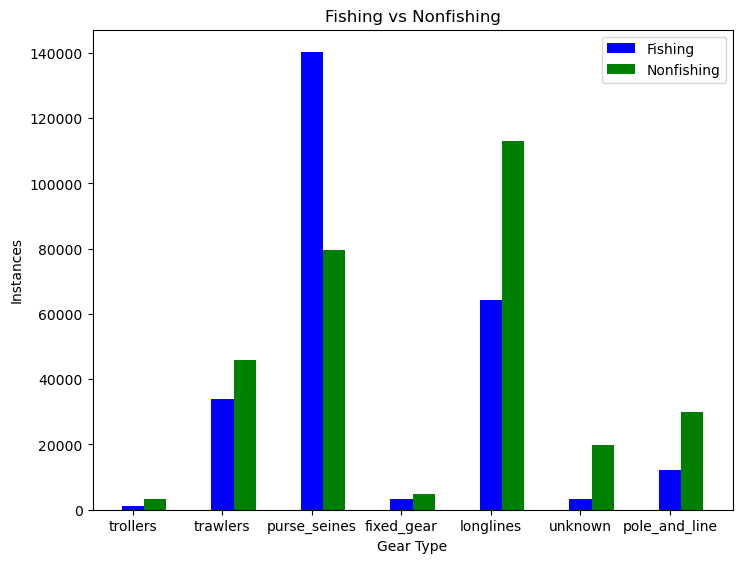

In [28]:
#visualizing the imbalance in each data set 
data = [fishing_count,
not_fishing_count]
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.xticks(range(len(gear_type)), gear_type)
plt.title('Fishing vs Nonfishing')
plt.legend(labels =['Fishing','Nonfishing'])
plt.ylabel('Instances')
plt.xlabel('Gear Type')
plt.show()

#### For this data any 'is_fishing' instance over zero is a fishing instance, simply changing these positive values to ones, to make this a binary classification problem 

In [29]:
#changing fishing values to 1 for true instead of any value over 1
new_is_fishing = []
for i in range(len(all_data['is_fishing'])):
    if all_data['is_fishing'][i] > 0:
        new_is_fishing.append(1)
    else:
        new_is_fishing.append(0)
new_is_fishing
all_data = all_data.drop(columns = ['is_fishing'])

In [30]:
#adding the 1 and 0 values into dataset 
all_data['is_fishing'] = new_is_fishing
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553853 entries, 0 to 553852
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mmsi                 553853 non-null  float64
 1   timestamp            553853 non-null  float64
 2   distance_from_shore  553853 non-null  float64
 3   distance_from_port   553853 non-null  float64
 4   speed                553853 non-null  float64
 5   course               553853 non-null  float64
 6   lat                  553853 non-null  float64
 7   lon                  553853 non-null  float64
 8   gear_type            553853 non-null  object 
 9   is_fishing           553853 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 42.3+ MB


In [31]:
#checking for balance over the whole data set 
all_data['is_fishing'].value_counts()

0    295978
1    257875
Name: is_fishing, dtype: int64

In [32]:

all_data.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,5.538530e+05,5.538530e+05,5.538530e+05,5.538530e+05,553853.000000,553853.000000,553853.000000,553853.000000,553853.000000
mean,1.487301e+14,1.420221e+09,2.942271e+05,4.143538e+05,3.949039,180.697572,21.946882,1.051767,0.465602
std,8.861800e+13,2.263571e+07,4.507028e+05,5.797200e+05,4.042098,111.229785,36.414888,80.643892,0.498816
min,1.252340e+12,1.325410e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-50.192177,-179.999115,0.000000
25%,6.960986e+13,1.409955e+09,0.000000e+00,1.299968e+04,0.000000,85.000000,-14.059834,-24.562532,0.000000
50%,1.341986e+14,1.421489e+09,5.586454e+04,1.015504e+05,3.100000,185.399994,35.928215,4.584265,0.000000
75%,2.299265e+14,1.435348e+09,4.758307e+05,6.478251e+05,7.100000,276.000000,53.650833,18.423798,1.000000
max,2.812058e+14,1.472890e+09,2.853625e+06,3.836963e+06,102.300003,511.000000,78.925163,179.991486,1.000000


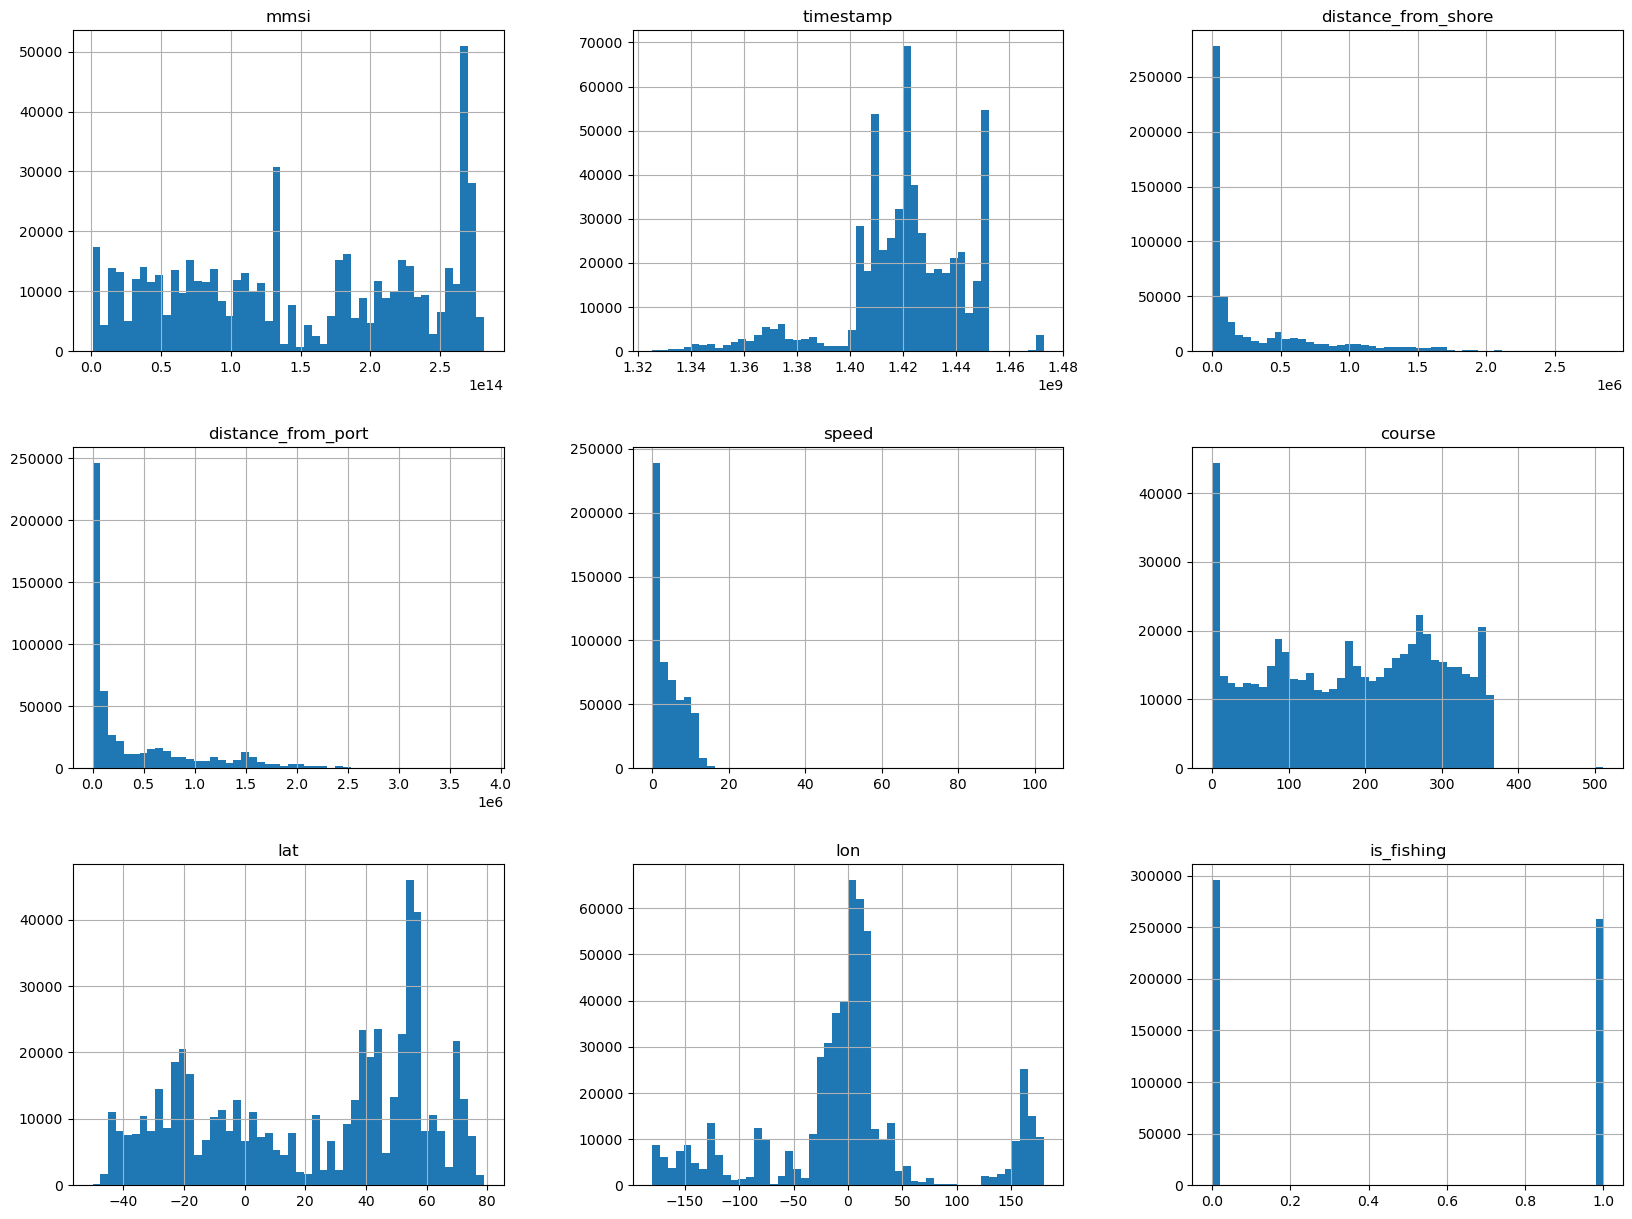

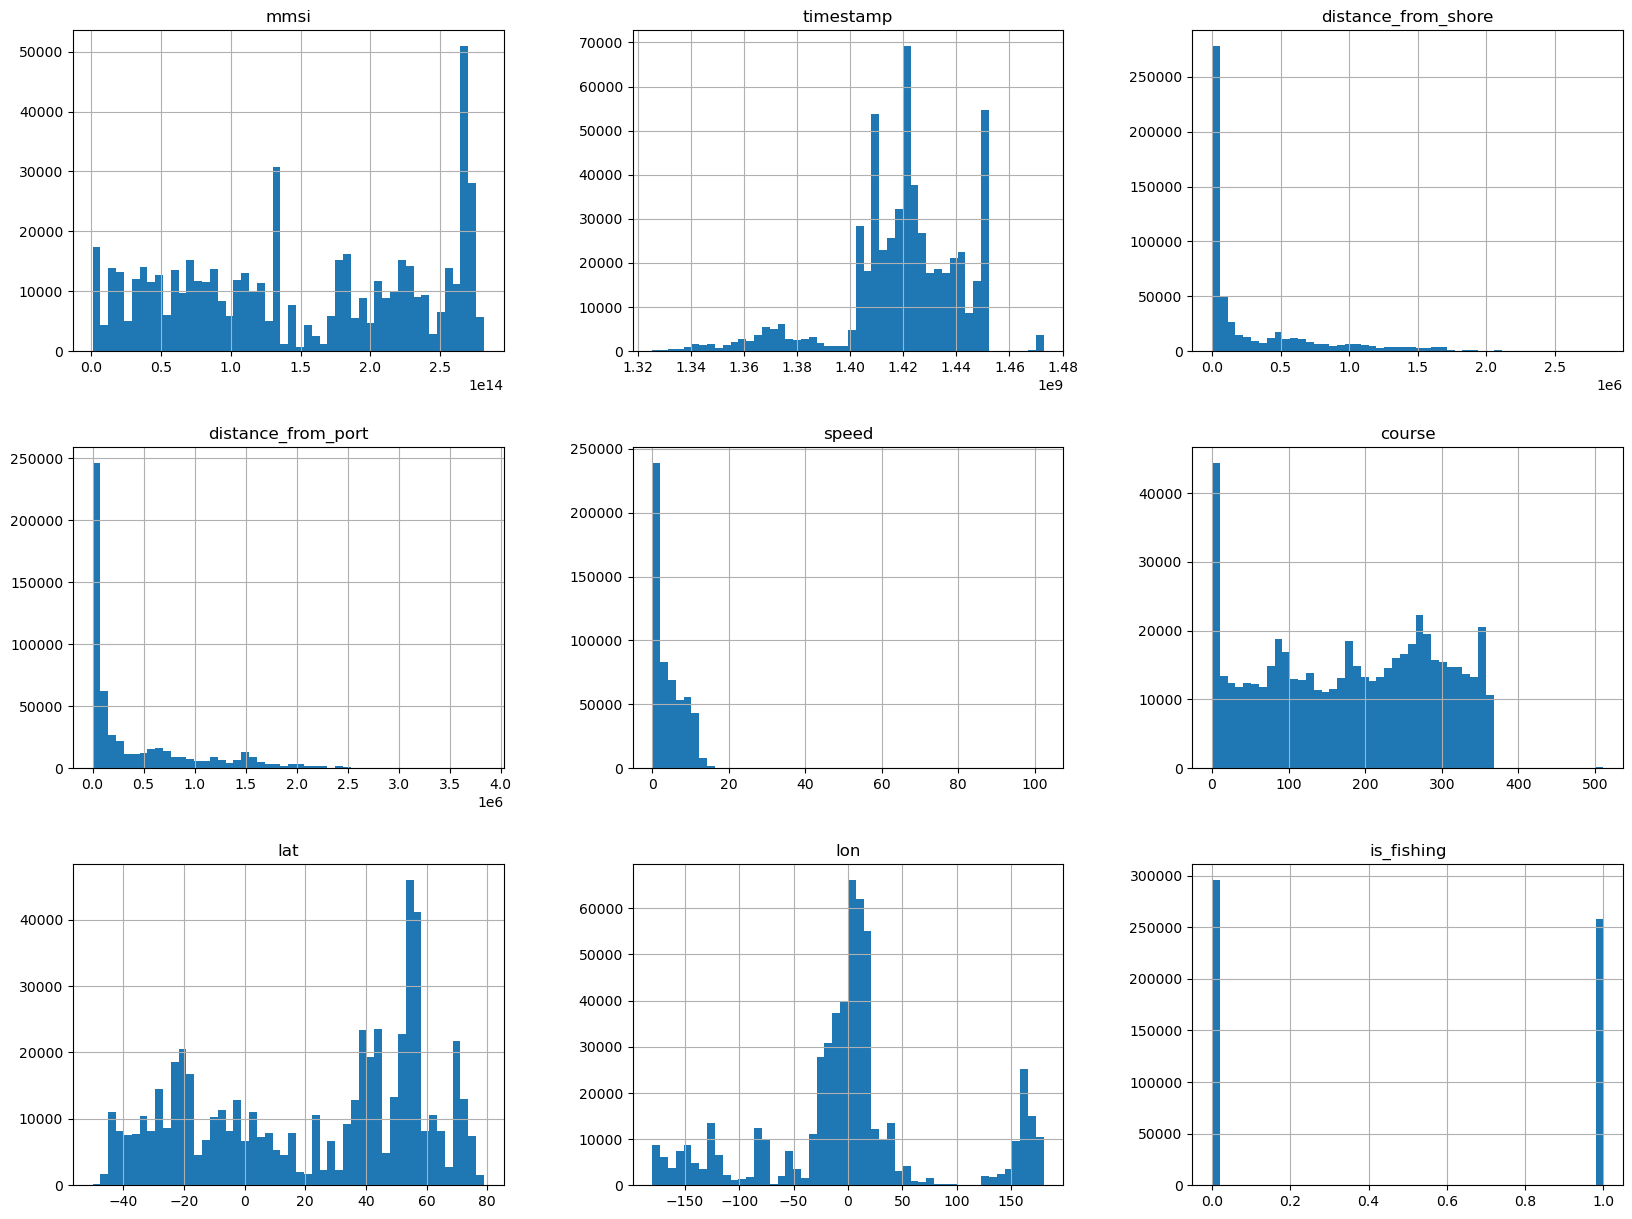

In [34]:
#histograms of each feature
all_data.hist(bins=50, figsize=(20,15))
plt.show() 

## splitting the dataset into features and targets 

In [35]:
from sklearn.model_selection import train_test_split

In [239]:
#target values 
y = all_data['is_fishing']
y

0         0
1         0
2         0
3         0
4         0
         ..
553848    0
553849    0
553850    0
553851    0
553852    0
Name: is_fishing, Length: 553853, dtype: int64

In [240]:
#features
X = all_data.drop(columns = ['is_fishing','gear_type'])
X

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
0,1.848346e+13,1.427865e+09,0.000000,2236.013184,0.0,137.899994,28.965490,-13.539565
1,1.848346e+13,1.427866e+09,0.000000,2236.013184,0.0,144.800003,28.965481,-13.539565
2,1.848346e+13,1.427867e+09,0.000000,2236.013184,0.0,0.000000,28.965487,-13.539558
3,1.848346e+13,1.427867e+09,0.000000,2236.013184,0.0,112.000000,28.965469,-13.539557
4,1.848346e+13,1.427868e+09,0.000000,2236.013184,0.0,95.300003,28.965473,-13.539560
...,...,...,...,...,...,...,...,...
553848,1.040818e+14,1.439086e+09,185384.234375,227073.718750,7.6,213.800003,55.501614,6.407568
553849,1.040818e+14,1.439086e+09,186449.171875,228049.234375,7.8,211.699997,55.496868,6.401987
553850,1.040818e+14,1.439086e+09,186449.171875,228049.234375,7.8,211.699997,55.496868,6.401987
553851,1.040818e+14,1.439087e+09,188675.000000,230003.046875,7.5,213.500000,55.480648,6.384378


In [241]:
#creating a train and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

## feature selection with Anova

In [242]:
#selecting 4 best features using F score(ANOVA)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 5)
selector.fit(X_train, y_train)

SelectKBest(k=5)

In [243]:
#looking at the scores
selector.scores_

array([ 1916.12829466,  4127.18966834, 56197.30890583, 68188.32968466,
       13316.9841692 ,   148.18251673, 13069.04267748,  1326.25491473])

In [244]:
#finding columns indices for best scores
columns = selector.get_support(indices = True)
columns 

array([1, 2, 3, 4, 6])

## feature importance for trees as suggested 

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X.columns)


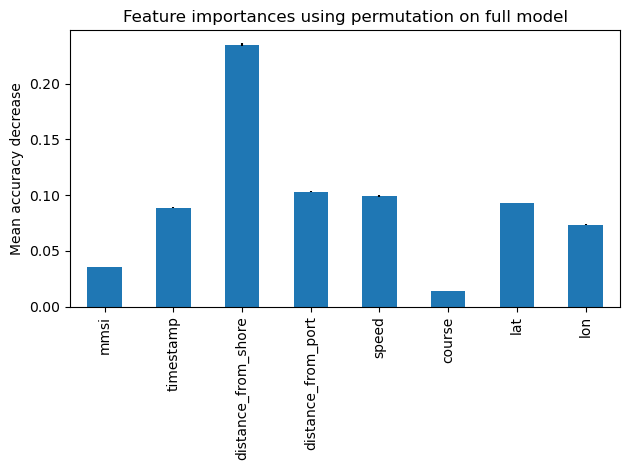

In [53]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## scaling training features for PCA

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [214]:
#scaling features of training set 
X_train_pca= scaler.fit_transform(X_train)
X_test_pca = scaler.fit_transform(X_test)

## PCA 

In [215]:
#principle component analysis 
from sklearn.decomposition import PCA
pca_8 = PCA(n_components = 8, random_state = 42)
pca_8.fit(X_train_pca)


PCA(n_components=8, random_state=42)

In [216]:
X_pca_8 = pca_8.transform(X_train_pca)

In [217]:
#making sure the explained variance totals to 100 
sum(pca_8.explained_variance_ratio_*100)

100.0

In [218]:
pca_8.explained_variance_ratio_*100

array([30.04789148, 25.26710835, 16.21491468, 13.52256649,  8.32691624,
        5.71803166,  0.54254868,  0.36002242])

In [219]:
np.cumsum(pca_8.explained_variance_ratio_*100)

array([ 30.04789148,  55.31499983,  71.52991451,  85.052481  ,
        93.37939724,  99.0974289 ,  99.63997758, 100.        ])

In [220]:
#pca_95 get 95 percent of the variance 
pca_95 = PCA(n_components =0.95, random_state = 42)
pca_95.fit(X_train_pca)
X_pca_95 = pca_95.transform(X_train_pca)
X_pca_95.shape

(415389, 6)

In [221]:
df_train_all = pd.DataFrame(X_pca_95, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])
df_train_all['target'] = all_data.is_fishing
df_train_all

,PC1,PC2,PC3,PC4,PC5,PC6,target
0,-0.546042,-0.194708,0.046641,0.182525,0.071434,-0.011047,0
1,0.442145,0.501090,-0.056871,0.311401,0.172532,0.005559,0
2,0.299192,-0.430828,-0.096849,-0.068562,-0.010232,0.086659,0
3,0.437222,0.359649,-0.320819,0.168400,-0.093552,-0.042143,0
4,-0.502137,-0.126878,0.084591,-0.181082,-0.010865,-0.163643,0
...,...,...,...,...,...,...,...
415384,0.259923,0.032880,-0.361990,-0.242489,0.336614,0.021295,0
415385,-0.063548,0.365861,0.129318,0.265001,-0.061998,0.027986,0
415386,-0.307376,-0.207110,0.040255,-0.292899,-0.010406,-0.143918,0
415387,-0.203844,0.337209,0.354644,-0.318371,-0.193267,-0.280346,0


In [229]:
y_pca = df_train_all['target']
X_pca = df_train_all.drop(columns = 'target')
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca, random_state = 42)

## Getting columns Using Anova feature selection

In [233]:
#resetting X and y after PCA 
#target values 
y = all_data['is_fishing']
#features
X = all_data.drop(columns = ['is_fishing','gear_type'])
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [245]:
#dropping other columns 
X_train = X_train.iloc[:,columns]
X_test = X_test.iloc[:,columns]

In [246]:
#scaling features of training set and test set 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### SGD with ANOVA 

In [202]:
#SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 10000, tol = 1e-3, random_state = 42 )
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=10000, random_state=42)

In [203]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.68360501, 0.68194391, 0.68099781])

#### SGD with PCA

In [180]:
#SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 10000, tol = 1e-3, random_state = 42 )
sgd_clf.fit(X_train_pca, y_train_pca)

SGDClassifier(max_iter=10000, random_state=42)

In [181]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_pca, y_train_pca, cv = 3, scoring = 'accuracy')

array([0.50503144, 0.50502181, 0.50502181])

#### Random Forrest

In [247]:
#random forrest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [248]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.97209363, 0.97130641, 0.97184807])

#### Try Random Forrest with PCA

In [230]:
#random forrest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train_pca, y_train_pca)

RandomForestClassifier(random_state=42)

In [231]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train_pca, y_train_pca, cv = 3, scoring = 'accuracy')

array([0.50145888, 0.50138184, 0.50036111])

#### SVC

In [65]:
from sklearn.svm import LinearSVC
svc_clf = LinearSVC(tol = 1e-5, random_state = 42)
svc_clf.fit(X_train, y_train)

LinearSVC(random_state=42, tol=1e-05)

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.67761785, 0.67626008, 0.67649119])

#### KNN

In [251]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [252]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.95892766, 0.95826322, 0.95929599])

#### Decsion Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.9345168 , 0.93595401, 0.93505124])

#### Logistic Regression 

In [71]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.68179225, 0.67986393, 0.68012393])

#### Nueral Network 

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
# want to create a random validation set
import random
random.seed(42)
mylist = random.sample(range(len(X_train)), 50000)


In [75]:
#turning y_train into array for NN
y_train_nn = np.array(y_train)

In [76]:
#creating X train and X_valid, all needing to be arrays 
X_valid = X_train[mylist]
X = []
for i in range(len(X_train)):
    if i not in mylist:
        X.append(X_train[i])
X_train_nn1 = np.array(X)



In [77]:
#creating y train and y_valid, all needing to be arrays 
y_valid = y_train_nn[mylist]
y = []
for i in range(len(y_train_nn)):
    if i not in mylist:
        y.append(y_train_nn[i])
y_train_nn1 = np.array(y)

In [78]:
#checking to make sure nothign went wrong creationg the validation set 
len(y_train_nn1) + len(y_valid) == len(y_train)


True

In [79]:
#building NN
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')  
])

In [80]:
#compiling NN
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#####  just some house keeping because I had issue with input data type

In [84]:
y_train_np = y_train_nn

In [83]:
type(y_train_nn)

numpy.ndarray

In [86]:
type(X_train_nn1)

numpy.ndarray

In [88]:
y_valid_np = y_valid

In [91]:
#fitting first model 
NN = model.fit(X_train_nn1, y_train_nn1, epochs = 30, validation_data = (X_valid, y_valid_np))

Train on 365389 samples, validate on 50000 samples
Epoch 1/30
365389/365389 [==============================] - 34s 93us/sample - loss: 0.6150 - accuracy: 0.6864 - val_loss: 0.5559 - val_accuracy: 0.7086
Epoch 2/30
365389/365389 [==============================] - 35s 96us/sample - loss: 0.5021 - accuracy: 0.7439 - val_loss: 0.4500 - val_accuracy: 0.7854
Epoch 3/30
365389/365389 [==============================] - 35s 95us/sample - loss: 0.4223 - accuracy: 0.8057 - val_loss: 0.4844 - val_accuracy: 0.7688
Epoch 4/30
365389/365389 [==============================] - 34s 92us/sample - loss: 0.4064 - accuracy: 0.8163 - val_loss: 0.4111 - val_accuracy: 0.8195
Epoch 5/30
365389/365389 [==============================] - 33s 90us/sample - loss: 0.3998 - accuracy: 0.8197 - val_loss: 0.4003 - val_accuracy: 0.8189
Epoch 6/30
365389/365389 [==============================] - 33s 90us/sample - loss: 0.3953 - accuracy: 0.8211 - val_loss: 0.3865 - val_accuracy: 0.8245
Epoch 7/30
365389/365389 [===========

In [92]:
#clearing session
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Doing grid search with nueral network 

In [93]:
# first build a function to build a model 
def build_model(n_hidden=7, n_neurons=100, learning_rate=.1, input_shape=[4]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(metrics = ['accuracy'],loss = 'mse', optimizer=optimizer)
    return model

In [94]:
#instantiate the NN classifier 
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [ ]:

from sklearn.model_selection import GridSearchCV
param_distribs = {
     'n_hidden':(5,9),
     'n_neurons':(100,200),
     'learning_rate':[.2,.4]
}
gridnn = GridSearchCV(keras_clf, param_distribs, cv = 3, verbose = 2)
gridnn.fit(X_train_nn1, y_train_nn1, epochs = 10, 
                  validation_data = (X_valid, y_valid),
                  callbacks = [keras.callbacks.EarlyStopping(patience =10)])

In [ ]:
gridnn.best_params_

In [ ]:
gridnn.best_score_

In [103]:
def build_model(n_hidden=5, n_neurons=100, learning_rate=.2, input_shape=[4]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(metrics = ['accuracy'],loss = 'mse', optimizer=optimizer)
    return model

In [104]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [105]:
keras_clf.fit(X_train_nn1, y_train_nn1, epochs = 12,
             validation_data = (X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience = 10)]
             )

Train on 365389 samples, validate on 50000 samples
Epoch 1/12
365389/365389 [==============================] - 40s 109us/sample - loss: 0.1633 - accuracy: 0.7650 - val_loss: 0.1880 - val_accuracy: 0.7728
Epoch 2/12
365389/365389 [==============================] - 39s 106us/sample - loss: 0.1305 - accuracy: 0.8169 - val_loss: 0.1441 - val_accuracy: 0.8053
Epoch 3/12
365389/365389 [==============================] - 39s 107us/sample - loss: 0.1231 - accuracy: 0.8268 - val_loss: 0.1256 - val_accuracy: 0.8236
Epoch 4/12
365389/365389 [==============================] - 39s 108us/sample - loss: 0.1187 - accuracy: 0.8339 - val_loss: 0.1157 - val_accuracy: 0.8367
Epoch 5/12
365389/365389 [==============================] - 39s 107us/sample - loss: 0.1159 - accuracy: 0.8371 - val_loss: 0.1195 - val_accuracy: 0.8368
Epoch 6/12
365389/365389 [==============================] - 39s 107us/sample - loss: 0.1135 - accuracy: 0.8406 - val_loss: 0.1099 - val_accuracy: 0.8464
Epoch 7/12
365389/365389 [=====

### Testing on test set 

In [ ]:
y_test_np = y_test.to_numpy()

In [106]:
y_pred = keras_clf.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_np, y_pred)

0.8564464409521608

## Let's do gridsearch on knn, decision tree, and also random forest and test on test set for accuracy, recall, precision and F1 

all of these models seems to generalize well when using cross validation. 

### Decision tree Grid Search

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.9345168 , 0.93595401, 0.93505124])

In [111]:
DT_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [112]:
param_grid = {
    'criterion':['gini'],
    'max_depth':range(29,100),
    'min_samples_split':[2],
    'min_samples_leaf':[1]
    
}

In [ ]:
grid = GridSearchCV(DT_clf, param_grid = param_grid, cv = 3, verbose = 1)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

### Decision Tree best model and metrics 

In [253]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(criterion= 'gini',
 max_depth=33,
 min_samples_leaf= 1,
 min_samples_split= 2, random_state=42)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=33, random_state=42)

In [254]:
y_pred = DT_clf.predict(X_test)

In [255]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9181520106309221

In [256]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9146219272406753

In [257]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9370928401617833

In [258]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8932034549226763

### KNN grid search 

In [116]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.93870565, 0.9388212 , 0.93871287])

In [118]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [119]:
param_grid = {'algorithm': ['auto'],
 'leaf_size': range(15,21),
 'metric': ['minkowski'],
 'n_neighbors': [4],
 'p': [1],
 'weights': ['distance']}

In [ ]:
grid1 = GridSearchCV(KNN, param_grid = param_grid, cv = 3, verbose = 1)
grid1.fit(X_train, y_train)

In [ ]:
grid1.best_params_

In [ ]:
grid1.best_estimator_

In [ ]:
grid1.best_score_

### KNN best model and Metrics

In [260]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm= 'auto',
 leaf_size=17,
 metric='minkowski',
 n_neighbors =4,
 p=1,
 weights='distance')
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=17, n_neighbors=4, p=1, weights='distance')

In [261]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.96778923, 0.96669868, 0.96789034])

In [262]:
y_pred = KNN.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9085610700254217

In [263]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9676947814646982

In [264]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9708543023866127

In [265]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9645557583472646

### Random Forrest Grid Search 


In [124]:
#random forrest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.9492572 , 0.9493872 , 0.94948831])

In [126]:
forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [127]:
param_grid = {'bootstrap': [False],
 'criterion': ['entropy'],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [3],
 'n_estimators': range(78,84),
 'warm_start': [True]}

In [ ]:
grid2 = GridSearchCV(forest_clf, param_grid = param_grid, cv = 3, verbose = 2)
grid2.fit(X_train, y_train)

In [ ]:
grid2.best_params_

In [ ]:
grid2.best_estimator_

In [ ]:
grid2.best_score_

### Random Forrest Best model and metrics


In [266]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42,bootstrap = False,
 criterion= 'entropy',
 max_features= 'auto',
 min_samples_leaf =  1,
 min_samples_split = 3,
 n_estimators = 80,
 warm_start = True)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_split=3, n_estimators=80, random_state=42,
                       warm_start=True)

In [267]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.97515582, 0.97436138, 0.97511248])

In [268]:

y_pred = forest_clf.predict(X_test)

In [269]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9607551421308066

In [270]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9584785133565621

In [271]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9682145172743832

In [272]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9489363633612733

## We have concluded that the best model to proceed with is the random forest
### Predicting fishing activity on instances with no data in this column 

In [274]:
#getting all of our original data again
all_data = pd.concat(dataframes)
all_data = all_data.reset_index(drop = True)

In [275]:
#creating a list of all indices without the fishing data on which we want to predict
no_fishing_data = []
for i in range(len(all_data)):
    if all_data.is_fishing[i] == -1:
        no_fishing_data.append(i)

In [276]:
#creating a database solely cotaining these instances with no fishing data 
no_fish_data = all_data.loc[no_fishing_data]

In [277]:
#dropping nulls and resetting indices 
no_fish_data= no_fish_data.dropna()

In [278]:
#cleaning this data inorder to use out model to predict fishing instances
no_fish_data_pred = no_fish_data.drop(columns = ['is_fishing','source','gear_type'])

In [279]:
#dropping our columns due to feature selection 
no_fish_data_pred = no_fish_data_pred.iloc[:,cols]

In [280]:
#viewing the data 
no_fish_data_pred

,timestamp,distance_from_shore,distance_from_port,speed,lat
0,1.337836e+09,0.0,3162.200195,0.0,51.887592
1,1.338199e+09,0.0,4999.877441,0.0,51.242130
2,1.343752e+09,0.0,66308.250000,8.6,51.960873
3,1.350795e+09,0.0,15296.682617,0.0,51.231094
4,1.351808e+09,0.0,15296.682617,0.0,51.231098
...,...,...,...,...,...
28581393,1.478701e+09,0.0,24697.572266,0.1,32.735428
28581394,1.479122e+09,0.0,24697.572266,0.1,32.735401
28581395,1.479191e+09,0.0,24697.572266,0.1,32.735405
28581396,1.479202e+09,0.0,24697.572266,0.1,32.735413


In [281]:
#scaling the data 
no_fish_data_pred = scaler.fit_transform(no_fish_data_pred)


In [282]:
#predicting fishing instances using oour random forrest 
is_fishing_pred = forest_clf.predict(no_fish_data_pred)

In [283]:
#Addinf these predictions into a column in our dataframe
no_fish_data['is_fishing'] = is_fishing_pred

In [284]:
#viewing the data with its new column 
no_fish_data

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,gear_type
0,7.652701e+13,1.337836e+09,0.0,3162.200195,0.0,0.000000,51.887592,4.356583,0,gfw,fixed_gear
1,7.652701e+13,1.338199e+09,0.0,4999.877441,0.0,0.000000,51.242130,4.403008,0,gfw,fixed_gear
2,7.652701e+13,1.343752e+09,0.0,66308.250000,8.6,292.200012,51.960873,5.196125,0,gfw,fixed_gear
3,7.652701e+13,1.350795e+09,0.0,15296.682617,0.0,0.000000,51.231094,4.526647,0,gfw,fixed_gear
4,7.652701e+13,1.351808e+09,0.0,15296.682617,0.0,0.000000,51.231098,4.526487,0,gfw,fixed_gear
...,...,...,...,...,...,...,...,...,...,...,...
28581393,2.145727e+14,1.478701e+09,0.0,24697.572266,0.1,101.400002,32.735428,-16.734407,0,gfw,trollers
28581394,2.145727e+14,1.479122e+09,0.0,24697.572266,0.1,148.600006,32.735401,-16.734411,0,gfw,trollers
28581395,2.145727e+14,1.479191e+09,0.0,24697.572266,0.1,153.899994,32.735405,-16.734396,0,gfw,trollers
28581396,2.145727e+14,1.479202e+09,0.0,24697.572266,0.1,331.100006,32.735413,-16.734430,0,gfw,trollers


## Adding our newly predicted data back into the whole dataset 

In [285]:
#dropping insatnces with no data from original data
new_all_data_nf = all_data.drop(no_fishing_data)

In [286]:
#concatinating our newly predicted dataframe with our other original data
new_all_data = pd.concat([new_all_data_nf,no_fish_data])


In [287]:
#sorting the data back into its orignal index 
new_all_data = new_all_data.sort_index()

In [288]:
#resseting index 
new_all_data = new_all_data.reset_index(drop = True)

In [289]:
new_all_data

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,gear_type
0,7.652701e+13,1.337836e+09,0.0,3162.200195,0.0,0.000000,51.887592,4.356583,0.0,gfw,fixed_gear
1,7.652701e+13,1.338199e+09,0.0,4999.877441,0.0,0.000000,51.242130,4.403008,0.0,gfw,fixed_gear
2,7.652701e+13,1.343752e+09,0.0,66308.250000,8.6,292.200012,51.960873,5.196125,0.0,gfw,fixed_gear
3,7.652701e+13,1.350795e+09,0.0,15296.682617,0.0,0.000000,51.231094,4.526647,0.0,gfw,fixed_gear
4,7.652701e+13,1.351808e+09,0.0,15296.682617,0.0,0.000000,51.231098,4.526487,0.0,gfw,fixed_gear
...,...,...,...,...,...,...,...,...,...,...,...
28581193,2.145727e+14,1.478701e+09,0.0,24697.572266,0.1,101.400002,32.735428,-16.734407,0.0,gfw,trollers
28581194,2.145727e+14,1.479122e+09,0.0,24697.572266,0.1,148.600006,32.735401,-16.734411,0.0,gfw,trollers
28581195,2.145727e+14,1.479191e+09,0.0,24697.572266,0.1,153.899994,32.735405,-16.734396,0.0,gfw,trollers
28581196,2.145727e+14,1.479202e+09,0.0,24697.572266,0.1,331.100006,32.735413,-16.734430,0.0,gfw,trollers


### We have basically finished up our machine learning back end of this project
### Now we will create dataframes based on location for the next part of this project in order to predict if boats of the west coast of the United States are fishing legally or not

In [148]:
#Creating a list with only entries off of the coast of california, oregon, and washington 
new_west = []
for i in range(len(new_all_data)):
    if 32.5<new_all_data.lat[i]<46.54  and -130<new_all_data.lon[i]<-115:
        new_west.append(i)
  

In [149]:
#looking to see how many instances this is 
len(new_west)

107240

In [152]:
#Creating our west coast dataframe 
westcoast_eez= new_all_data.iloc[new_west]
westcoast_eez = westcoast_eez.reset_index(drop = True)
westcoast_eez

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,gear_type
0,1.259544e+14,1.439419e+09,0.0,999.975464,0.0,302.399994,44.627125,-124.055397,0.0,gfw,trollers
1,1.259544e+14,1.439421e+09,0.0,999.975464,0.0,271.799988,44.627121,-124.055389,0.0,gfw,trollers
2,1.259544e+14,1.439421e+09,0.0,999.975464,0.0,304.899994,44.627102,-124.055428,0.0,gfw,trollers
3,1.259544e+14,1.439422e+09,0.0,999.975464,0.0,330.500000,44.627132,-124.055389,0.0,gfw,trollers
4,1.259544e+14,1.439425e+09,0.0,999.975464,0.0,4.100000,44.627117,-124.055389,0.0,gfw,trollers
...,...,...,...,...,...,...,...,...,...,...,...
107235,2.296758e+14,1.480032e+09,0.0,999.975464,0.0,257.399994,46.200233,-123.758881,0.0,gfw,unknown
107236,2.296758e+14,1.480032e+09,0.0,999.975464,0.0,255.300003,46.200241,-123.758881,0.0,gfw,unknown
107237,2.296758e+14,1.480032e+09,0.0,999.975464,0.0,247.600006,46.200226,-123.758881,0.0,gfw,unknown
107238,2.296758e+14,1.480032e+09,0.0,999.975464,0.0,226.500000,46.200226,-123.758904,0.0,gfw,unknown


### I decided to repeat this process for Alaska and Hawaii because of the lack of data off of the west coast alone

In [174]:
#creating list of AK instances
ak = []
for i in range(len(new_all_data)):
    if 170<new_all_data.lon[i]<180 or -180<new_all_data.lon[i]<-129.9819:
        if 47.8764<new_all_data.lat[i]<74.7088:
            ak.append(i)
  

In [175]:
#Creating data frame 
ak_eez= new_all_data.iloc[ak]
ak_eez = ak_eez.reset_index(drop = True)
ak_eez

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,gear_type
0,1.252340e+12,1.377315e+09,135070.734375,246044.78125,3.200000,159.000000,52.458599,-167.559769,1.0,gfw,trawlers
1,5.110130e+13,1.439794e+09,783016.562500,886824.93750,3.400000,29.799999,52.788227,-150.730576,1.0,gfw,trawlers
2,5.110130e+13,1.477888e+09,48258.527344,100799.31250,5.700000,4.800000,53.270294,172.695465,1.0,gfw,trawlers
3,1.214265e+14,1.442000e+09,219667.093750,291197.25000,51.200001,163.000000,52.266499,170.783997,0.0,gfw,trawlers
4,1.924269e+14,1.428801e+09,279424.718750,325975.12500,76.800003,235.000000,51.445686,171.361420,1.0,gfw,trawlers
...,...,...,...,...,...,...,...,...,...,...,...
427484,2.296758e+14,1.474424e+09,131924.765625,284864.90625,9.400000,133.399994,51.190495,-130.152420,0.0,gfw,unknown
427485,2.296758e+14,1.474426e+09,120765.406250,282329.75000,8.900000,129.399994,51.149391,-130.079819,0.0,gfw,unknown
427486,2.296758e+14,1.474426e+09,119863.648438,281569.03125,8.400000,136.199997,51.142899,-130.068695,0.0,gfw,unknown
427487,2.296758e+14,1.474427e+09,113213.828125,281106.96875,7.900000,131.399994,51.120838,-130.029739,0.0,gfw,unknown


In [ ]:
#creating list of hawaiian instances 
hi = []
for i in range(len(new_all_data)):
    if 15.5631<new_all_data.lat[i]<31.7979 and -177.9<new_all_data.lon[i]<-151.2768:
        hi.append(i)

In [ ]:
#creating hawaiian data frame
hi_eez= new_all_data.iloc[hi]
hi_eez = hi_eez.reset_index(drop = True)
hi_eez

### Saving these databases and moving to other jupyter notebook for graphical representaion

In [166]:
westcoast_eez.to_csv('westcoast.csv',index = False)

In [ ]:
hi_eez.to_csv('hi.csv',index = False)

In [176]:
ak_eez.to_csv('ak.csv',index = False)